# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
!pip install scipy==1.10.1
!pip install scikit-plot

In [2]:
!pip install ucimlrepo

In [3]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [5]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [6]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
397,89.0,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195
89,80.0,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184
814,85.0,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
666,102.0,43,96,197,63,10,185,36,22,142,202,513,139,65,8,12,195,204
21,84.0,37,53,121,59,5,123,55,17,125,141,221,133,82,7,1,179,183
218,83.0,44,68,144,61,8,147,45,19,143,170,325,180,74,1,1,185,191
140,90.0,37,80,171,58,9,157,42,20,132,172,373,115,60,3,18,201,209
31,88.0,42,77,151,58,8,140,47,18,142,165,293,158,64,10,11,198,205
243,101.0,55,108,228,69,12,215,31,24,168,229,684,214,71,2,16,188,199
714,94.0,44,70,186,72,8,153,42,19,144,171,361,178,67,7,2,199,206


Methods `describe` and `info` deliver some useful information.

In [7]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,548.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.737226,44.981785,81.799636,169.225865,62.111111,8.805100,168.936248,41.071038,20.642987,147.870674,188.979964,441.497268,175.298725,72.790528,6.506375,12.582878,188.537341,195.406193
std,8.313571,6.659856,15.761334,34.281041,10.336158,5.840043,34.155472,9.329553,2.743947,15.665168,31.844420,179.203811,34.632719,8.124590,5.565671,8.818887,9.597225,7.602633
min,73.000000,33.000000,36.000000,73.000000,47.000000,3.000000,6.000000,26.000000,17.000000,20.000000,127.000000,189.000000,112.000000,59.000000,0.000000,0.000000,19.000000,181.000000
25%,87.750000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,150.000000,68.000000,3.000000,6.000000,184.000000,189.000000
50%,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,100.000000,50.000000,98.000000,196.000000,66.000000,10.000000,197.000000,46.000000,23.000000,160.000000,217.000000,579.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,100.000000,110.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,41.000000,204.000000,211.000000


In [8]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 397 to 744
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       548 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [9]:
from sklearn.preprocessing import StandardScaler

def remove_missing_rows(X, y):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)

    combined = pd.concat([X, y], axis=1)

    cleaned = combined.dropna()

    X_cleaned = cleaned.iloc[:, :-y.shape[1]]
    y_cleaned = cleaned.iloc[:, -y.shape[1]:]

    return X_cleaned, y_cleaned

# удаляем строки с утерянными параметрами
X_train, y_train = remove_missing_rows(X_train, y_train)
X_test, y_test = remove_missing_rows(X_test, y_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# нормализуем тестовые и трейновые данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

logistic_model = LogisticRegression(penalty='l2', solver='saga', tol=1e-3, max_iter=500)


# с помощью кросс-валидационного поиска ищем лучший на сетке коэффициент регуляризации
param_grid = {'C': np.logspace(-2, 3, 6)}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']

print(f"Best C: {best_C}")


# оцениваем f1 и accuracy обученной модели с подобранным коэффициентом 'C'
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 score: {f1}")

Best C: 10.0
Accuracy: 0.7744107744107744
F1 score: 0.772488752951959


Получились не очень высокие метрики. Далее, по roc-кривым получиться понять, из-за чего так произошло

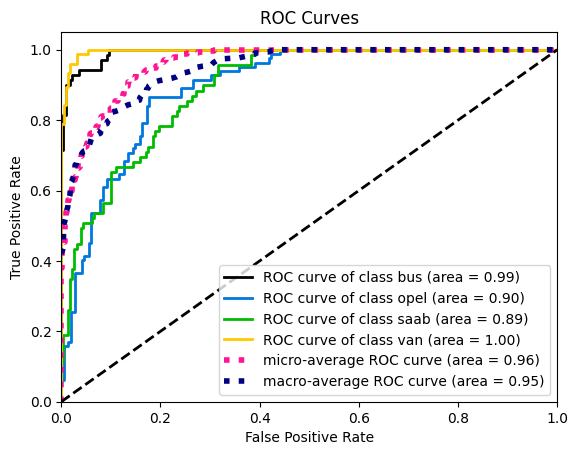

In [11]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# строим roc кривые
y_probas = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

По кривым видно, что автобусы и вэны хорошо отличимы от остальных классов. Саабы и опели, видимо из-за похожих размеров и форм кузовов, плохо отличаются друг от друга, что влияет на общую точность модели.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

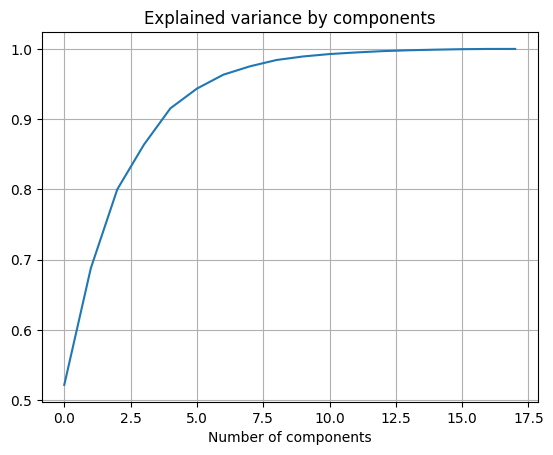

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

# Строим график кумулятивной суммы доли объясненной дисперсии от количества параметров
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

По графику заметно, что 95% доли объясненной дисперсии накапливается с 7 параметрами

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
n_components = 7
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_train_pca: (548, 7)
Shape of X_test_pca: (297, 7)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
from sklearn.pipeline import Pipeline

{'logistic__C': 1.0}
Accuracy: 0.6397306397306397
F1 Score: 0.6212938678642923


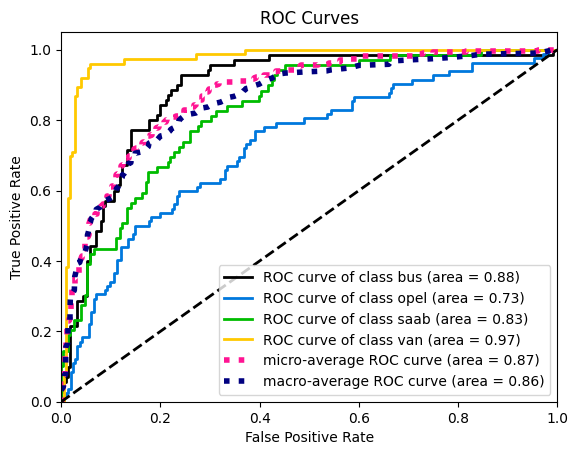

In [15]:
# Сделаем пайплайн с Pca и логистической регрессией
pipeline = Pipeline([
    ('pca', pca),
    ('logistic', LogisticRegression(solver='saga', tol=1e-3, max_iter=500))
])

# Будем выбирать лучшее значение коэффициента регуляризации на сетке с помощью кросс-валидации
param_grid = {'logistic__C': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy').fit(X_train, y_train)
print(grid_search.best_params_)

# С помощью метрик оцени=ваем качество модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# строим roc кривые для модели логистической регрессии с pca
y_probas = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

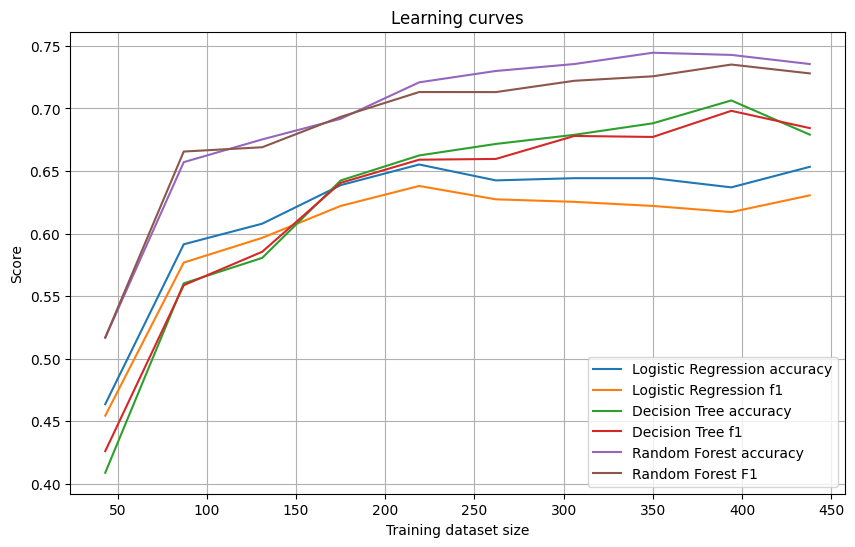

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 10)


# для ранее обученнной логистической регрессии получаем обучающую кривую для метрик f1 и accuracy
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')
lr_accuracy_mean = np.mean(test_scores, axis=1)

train_sizes_abs, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='f1_weighted')
lr_f1_mean = np.mean(test_scores, axis=1)


# то же делаем для решающих деревьев
dt_model = DecisionTreeClassifier()
train_sizes_abs, train_scores, test_scores = learning_curve(
    dt_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')
dt_accuracy_mean = np.mean(test_scores, axis=1)

train_sizes_abs, train_scores, test_scores = learning_curve(
    dt_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='f1_weighted')
dt_f1_mean = np.mean(test_scores, axis=1)

# и для случайного леса делаем то же
rf_model = RandomForestClassifier()
train_sizes_abs, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')
rf_accuracy_mean = np.mean(test_scores, axis=1)

train_sizes_abs, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='f1_weighted')
rf_f1_mean = np.mean(test_scores, axis=1)


# строим графики
plt.figure(figsize=(10, 6))

plt.plot(train_sizes_abs, lr_accuracy_mean, label='Logistic Regression accuracy')
plt.plot(train_sizes_abs, lr_f1_mean, label='Logistic Regression f1')

plt.plot(train_sizes_abs, dt_accuracy_mean, label='Decision Tree accuracy')
plt.plot(train_sizes_abs, dt_f1_mean, label='Decision Tree f1')

plt.plot(train_sizes_abs, rf_accuracy_mean, label='Random Forest accuracy')
plt.plot(train_sizes_abs, rf_f1_mean, label='Random Forest F1')

plt.xlabel('Training dataset size')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend()
plt.grid(True)
plt.show()

Наибольшую эффективность показал случайный лес